In [1]:
# main modules needed
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [55]:
df=pd.read_csv('012format_last.csv')

In [56]:
df.shape

(9765, 35220)

In [57]:
df.rename(columns={"Unnamed: 0": "id"},inplace=True)

In [58]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [59]:
ID=[]
for idx in df['id']:
    ID.append(str(idx))

In [75]:
df.id=ID

In [76]:
## add a new varible, namely origin, as a new varible
origin=[]
for idx in df['id']:
    if idx.startswith('PI'):
        origin.append('0')
    else: 
       origin.append('2')

In [77]:
Counter(origin)

Counter({'0': 8750, '2': 1015})

In [62]:
df['origin']=origin

In [63]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35211,35212,35213,35214,35215,35216,35217,35218,35219,origin
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,2,0
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [64]:
cleaned_t = pd.read_csv('combined_ypo.csv')

In [70]:
cleaned_t.head()

,id,yield,protein,oil
0,PI103414,2.28,37.7,21.6
1,PI132215,1.84,39.7,20.4
2,PI153214,1.82,41.1,18.2
3,PI153229,1.74,38.3,19.5
4,PI153236,2.07,39.0,20.4


In [78]:
g_plus_p=pd.merge(df,cleaned_t, left_on=df.id, right_on=cleaned_t.id, how='inner')

In [79]:
g_plus_p.shape

(9765, 35226)

In [80]:
g_plus_p.head()

,key_0,id_x,Unnamed: 0.1,2,3,4,5,6,7,8,...,35215,35216,35217,35218,35219,origin,id_y,yield,protein,oil
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI253651A,2.43,42.6,18.5
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,0,2,0,2,0,PI347550A,3.29,44.7,19.8
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI408055A,2.41,46.7,18.0
3,PI408069,PI408069,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI408069,NaN,43.2,20.6
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,0,0,0,0,PI408169A,1.93,45.8,16.4


In [81]:
g_plus_p.to_csv('g_plus_p_012.csv')

### Mathine Learning for Protein Content using Lasso

In [85]:
X=g_plus_p.iloc[:,3:35221]

In [86]:
Y=g_plus_p['protein'].fillna(np.mean(g_plus_p['protein']))

In [87]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7812, 35218) (7812,)
(1953, 35218) (1953,)


In [88]:
print('       min   max  mean   sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min   max  mean   sd
Train: 37.3 51.2 44.25311375203162 2.4506384809171626
Test: 37.6 51.1 44.444008866827815 2.4880814739407824


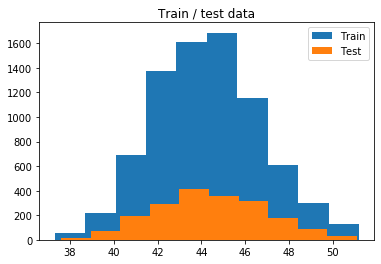

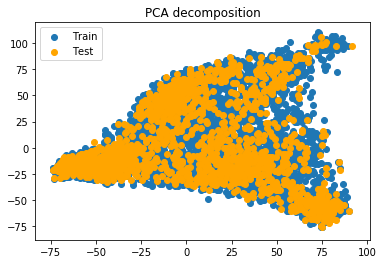

In [89]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

# marker PCA, use whole X with diff color for train and test
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

In [90]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)
print(len(pvals))


35218


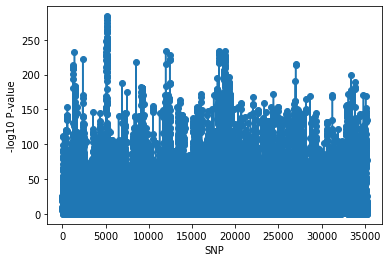

In [91]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# select by min_P_value
min_P_value = 4 # P = 0.0001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [69]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Create the hyperparameter grid
a = np.linspace(0, 1, 20)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet alpha: {'alpha': 0.05263157894736842}
Tuned ElasticNet R squared: 0.38253214129744284
Tuned ElasticNet MSE: 3.946885986841166



MSE in prediction = 3.686094069581479

Corr obs vs pred = 0.6404486255872506


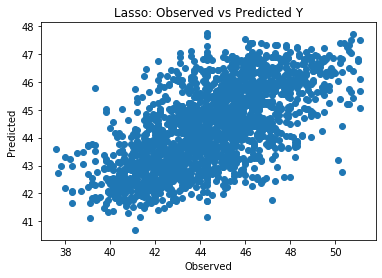

In [92]:
import sklearn.metrics as sm
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.052)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [ ]:
### Mathine Learning for Protein Content using RandomForestClassifier

In [98]:
 from sklearn.ensemble import RandomForestRegressor

In [99]:
clf = RandomForestRegressor(200)


MSE in prediction = 3.535789721102553

Corr obs vs pred = 0.6583876616118188


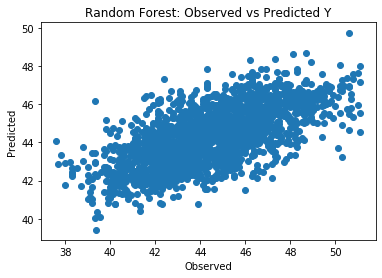

In [100]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


### Mathine Learning for Oil Content

In [101]:
X=g_plus_p.iloc[:,3:35221]

In [102]:
Y=g_plus_p['oil'].fillna(np.mean(g_plus_p['oil']))

In [103]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7812, 35218) (7812,)
(1953, 35218) (1953,)


In [104]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 13.0 24.1 18.575596086242044 1.974523167377128
Test: 13.0 24.0 18.561186822589335 2.0355088499043164


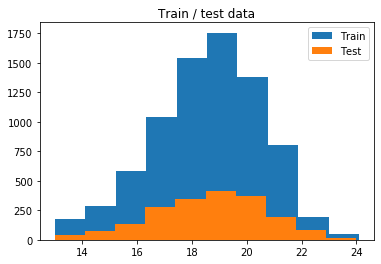

In [105]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()


In [106]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


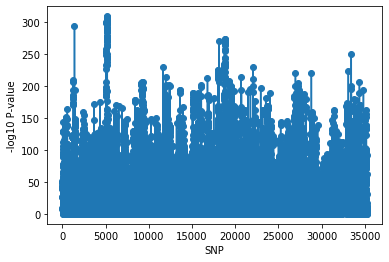

In [107]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()


#  select by min_P_value
min_P_value = 3 # P = 0.01
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [50]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## First round, I tried the  np.linspace(0, 1, 30), I found thar 0.037 is the best alpha,
## however, 0.037 was the second value to 0, so it's nessary to try value between 0 and 0.037.
# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'alpha': 0.024666666666666663}
Tuned ElasticNet R squared: 0.40864752013114614
Tuned ElasticNet MSE: 2.213893660528818



MSE in prediction = 2.2115077912050003

Corr obs vs pred = 0.6406115315720268


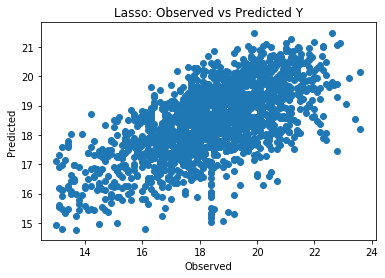

In [51]:
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.025)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [108]:
clf = RandomForestRegressor(100)


MSE in prediction = 2.3833129321580064

Corr obs vs pred = 0.6522487530629139


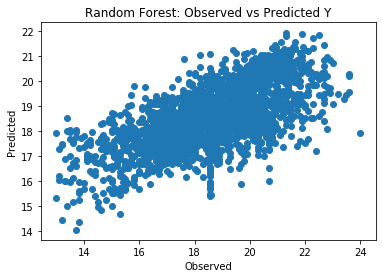

In [109]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

## Mathine Learning for Yield

In [110]:
X=g_plus_p.iloc[:,3:35221]

In [111]:
Y=g_plus_p['yield'].fillna(np.mean(g_plus_p['yield']))

In [112]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7812, 35218) (7812,)
(1953, 35218) (1953,)


In [113]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 0.03 4.958 2.207843575533997 0.8374468529264028
Test: 0.14 4.886 2.1934325434822526 0.8377300285292857


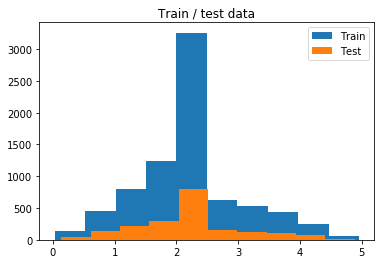

In [114]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()



In [115]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


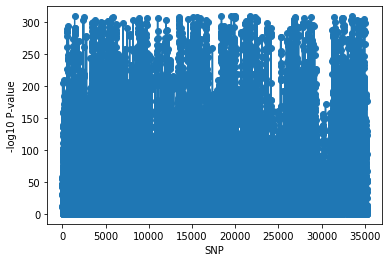

In [116]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()


# select by min_P_value
min_P_value = 3 # P = 0.001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [59]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Create the hyperparameter grid
a = np.linspace(0, 0.037, 10)
param_grid = {'alpha': a}

# Instantiate the ElasticNet regressor: elastic_net
lasso = linear_model.Lasso()

# Setup the GridSearchCV
gm_cv=GridSearchCV(lasso,param_grid,cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'alpha': 0.008222222222222221}
Tuned ElasticNet R squared: 0.5098105223377667
Tuned ElasticNet MSE: 0.252433890130012



MSE in prediction = 0.25239926606696184

Corr obs vs pred = 0.7184356916821806


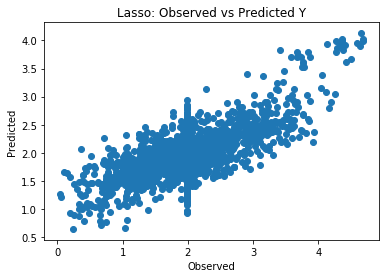

In [61]:
## Use the best parameter from the above grid-search, namely: 'alpha'= 0.008222
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.0082)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


In [117]:
clf = RandomForestRegressor(100)


MSE in prediction = 0.24853363970230263

Corr obs vs pred = 0.803699008940879


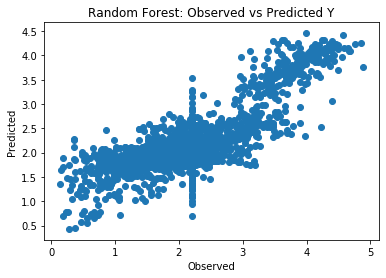

In [118]:
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# mean squared error
mse = sm.mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Random Forest: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

## Random Forest method outperform linear model for all three traits